# Berstein-Vazirani Algorithm

This implementation of the Berstein-Vazirani model will deal with _n_-qubit black boxes and is specifically designed as a game. The user will input any binary string and the circuit implementing the algorithm will guess it using only 1 query.

In [161]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

## User Input

Please type your number here :

In [162]:
userNum = 7
binaryConvert = bin(userNum)[2:]
noOfBits = len(binaryConvert)
print(binaryConvert)

111


# Quantum Variant Implementation

## Defining the Circuit

In [163]:
qReg = QuantumRegister(noOfBits + 1, name = 'q')
cReg = ClassicalRegister(noOfBits, name = 'cr')
qCirc = QuantumCircuit(qReg, cReg)

## Initial Hadamards

In [164]:
qCirc.x(noOfBits)
for i in range(0,noOfBits+1) :
    qCirc.h(i)
qCirc.barrier()

## Querying the Oracle

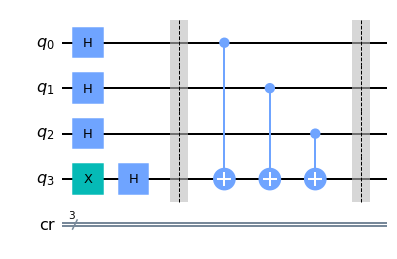

In [165]:
for i in range(0,noOfBits) :
    if(binaryConvert[noOfBits - 1 - i] == '1') :
        qCirc.cx(i, noOfBits)
qCirc.barrier()
qCirc.draw('mpl')

## Final Hadamards

In [166]:
for i in range(0,noOfBits) :
    qCirc.h(i)
qCirc.barrier() 

## Measuring the Circuit

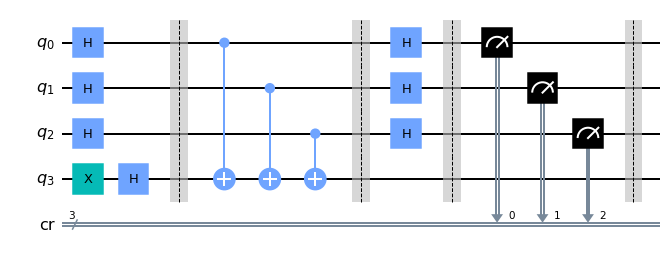

In [167]:
for i in range(0,noOfBits) :
    qCirc.measure(qReg[i],cReg[i])
qCirc.barrier()
qCirc.draw('mpl')

## Simulating Natively

{'111': 4096}


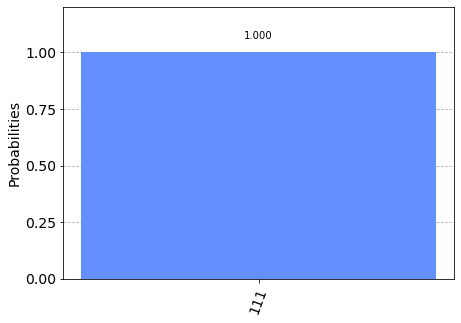

In [168]:
nativeSim = Aer.get_backend('qasm_simulator')
nativeResult = execute(qCirc, backend = nativeSim, shots = 4096).result()
counts = nativeResult.get_counts()
print(counts)
plot_histogram(counts)

SUCCCESSSS!!! We got it done in 1 shot. Yay!

## Simulating on a Real Quantum Computer

In [169]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-12-23 18:30:43,903: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [175]:
qProvider = IBMQ.get_provider()
qComp = qProvider.get_backend('ibmq_valencia')
job = execute(qCirc, backend = qComp)
job_monitor(job)

Job Status: job incurred error     


In [172]:
realCounts = job.result().get_counts(qCirc)
plot_histogram(realCounts)

IBMQJobFailureError: 'Unable to retrieve result for job 5fe35497a6f2af001ab8cf37. Job has failed: Qubit measurement not the final instruction.. Error code: 7006.'

# Classical Variant Implementation